 # Analisis exploratorio inicial

In [16]:
import os
import skimage.io as skd
import numpy as np
import matplotlib.pyplot as plt
import random

## Carga de datos - investigar si se puede hacer con Keras!

In [3]:
def load_data(data_path):
    dirs = [x for x in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, x))]
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_path, d)
        files = [os.path.join(label_dir, f) 
                 for f in os.listdir(label_dir) 
                 if os.path.isfile(os.path.join(label_dir, f)) and f.endswith('.jpg')]
        for f in files:
            images.append(skd.imread(f))
            labels.append(int(d))
    return images, labels

In [7]:
images, labels = load_data('/home/ruben/workspace/uc3m/tfg/deep-learning-facial-recognition/data/age')
images = np.array(images)

## Primera impresion del conjunto de imagenes

In [8]:
print('IMAGES - Np_Dim: %d, Np_Bytes: %d, Np_ItemSize: %d, Shape: %s' % (images.ndim, images.nbytes, images.itemsize, images.shape))

IMAGES - Np_Dim: 4, Np_Bytes: 2844480000, Np_ItemSize: 1, Shape: (23704, 200, 200, 3)


In [62]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

## Grafica - Distribucion de imagenes por clase / label

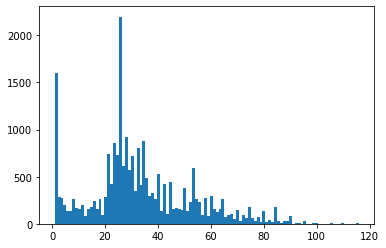

In [36]:
labels = np.array(labels)
plt.hist(labels, len(set(labels)))
plt.show()

## Numero total de imagenes asociadas a los labels y numero de labels distintos

In [37]:
print('LABELS - Np_Dim: %d, Np_Size: %d, Amount: %s' % (labels.ndim, labels.size, len(set(labels))))

LABELS - Np_Dim: 1, Np_Size: 23704, Amount: 104


## Visualizacion aleatoria de 6 imagenes para ver que han cargado correctamente

In [22]:
rand_images = random.sample(range(0, len(labels)), 6)
rand_images

[4587, 126, 23184, 6279, 14974, 15321]

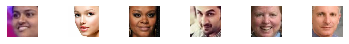

In [27]:
for i in range(len(rand_images)):
    plt.subplot(1, 6, i+1)
    plt.axis('off')
    plt.imshow(images[rand_images[i]])
    plt.subplots_adjust(wspace = 1)
plt.show()

## Visualizacion de una imagen y conteo total por clase / label

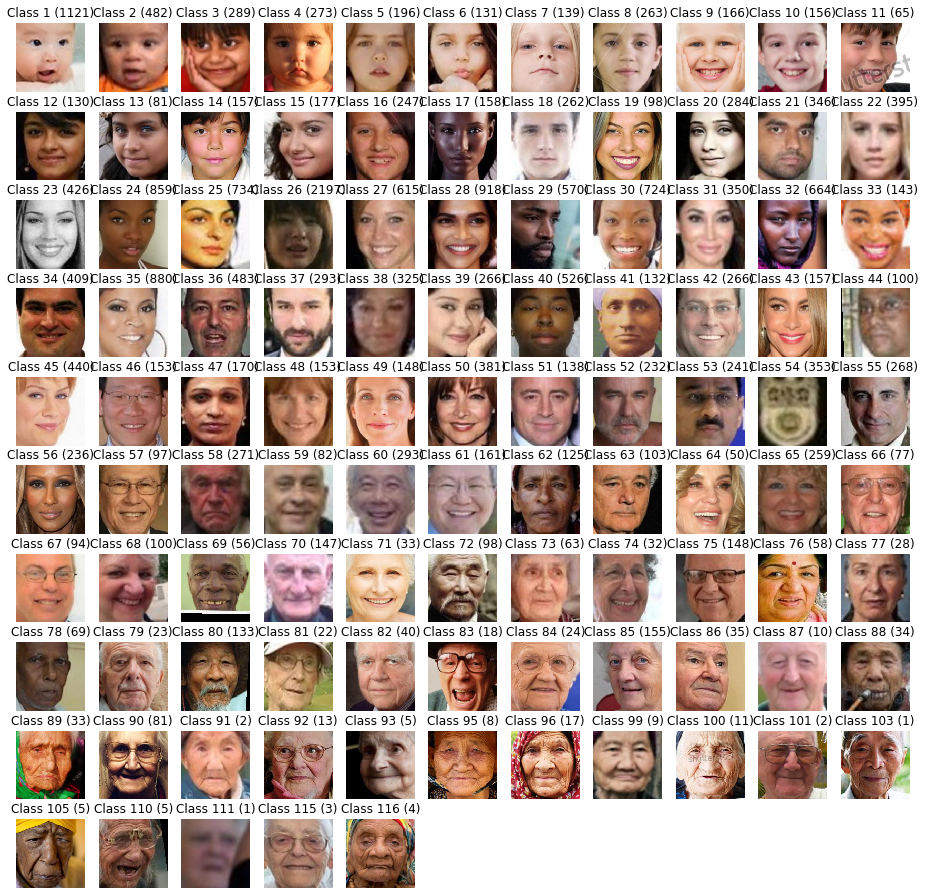

In [34]:
unique_labels = set(labels)
plt.figure(figsize=(16, 16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(10, 11, i)
    plt.axis('off')
    plt.title('Class {} ({})'.format(label, list(labels).count(label)))
    i += 1
    plt.imshow(temp_im)
plt.show()

## Recorremos imagenes y obtenemos el tamaño comun mínimo de imagen en base a los tamaños de todas ellas

In [38]:
w, h = 9999, 9999
for image in images:
    h = image.shape[0] if image.shape[0] < h else h
    w = image.shape[1] if image.shape[1] < w else w
print('Minimum size: {}x{}'.format(h, w))

Minimum size: 200x200
